#### ALGORITMO DE GRADIENTE

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Importamos librerías para manejo de tiempo
import time

In [2]:
# Cargamos la imagen en escala de grises
img = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP2\metalgrid.jpg', cv.IMREAD_GRAYSCALE)
h, w = img.shape

In [104]:
# Calculamos el gradiente en modulo y angulo
# Antes hacemos un blur gaussiano de la imagen para minimizar el ruido
imgblur = cv.GaussianBlur(img,(5,5),0)

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(imgblur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(imgblur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

(Text(0.5, 1.0, 'Angle'), ([], []), ([], []))

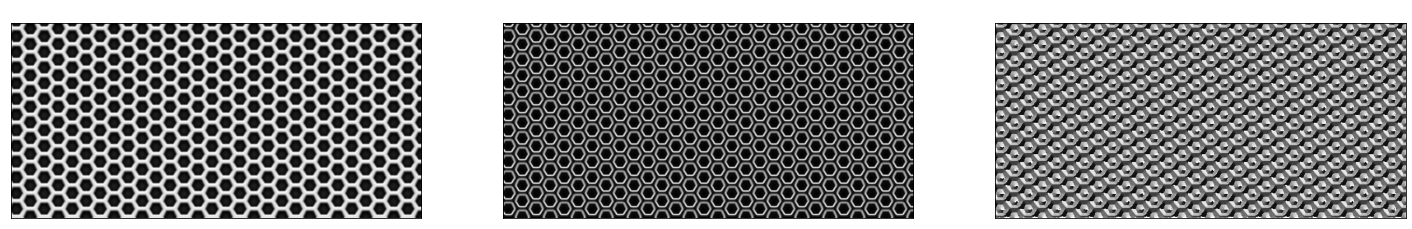

In [206]:
# Ploteamos las 3 imagenes, original, magnitud y angulo
plt.figure(1,figsize=(25,20))
ax1=plt.subplot(1,3,1),plt.imshow(imgblur,cmap = 'gray')
plt.title('Original',color='w'), plt.xticks([]), plt.yticks([])
ax2=plt.subplot(1,3,2),plt.imshow(mag,cmap = 'gray')
plt.title('Magnitud',color='w'), plt.xticks([]), plt.yticks([])
ax3=plt.subplot(1,3,3),plt.imshow(angle,cmap = 'gray')
plt.title('Angle',color='w'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Angle (zoom)'), ([], []), ([], []))

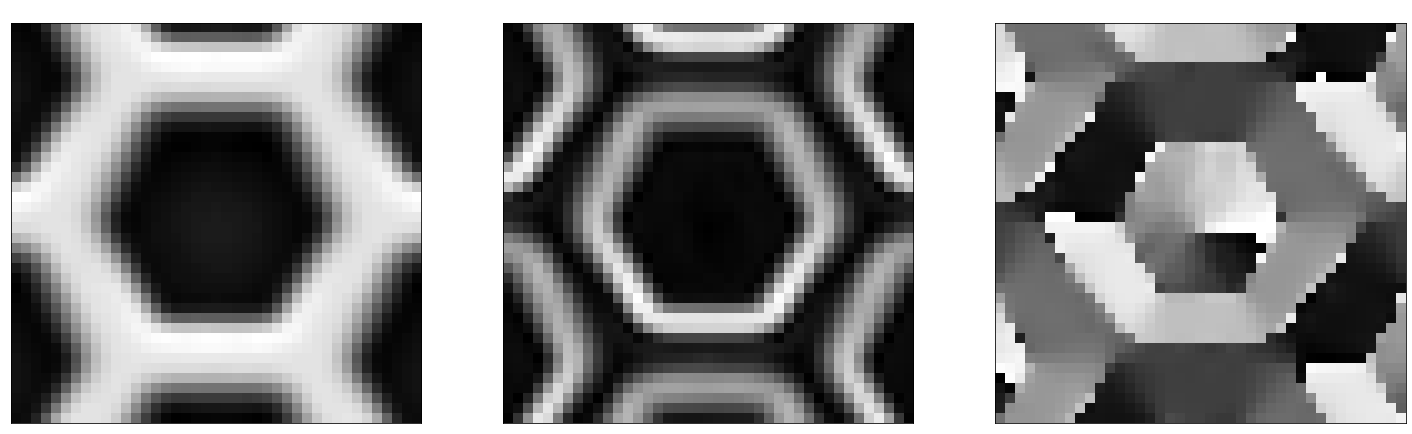

In [210]:
# Ploteamos las 3 imagenes con zoom sobre un hegagono, original, magnitud y angulo
plt.figure(1,figsize=(25,20))
ax1=plt.subplot(1,3,1),plt.imshow(imgblur[202:242,339:380],cmap = 'gray')
plt.title('Original (zoom)',color='w'), plt.xticks([]), plt.yticks([])
ax2=plt.subplot(1,3,2),plt.imshow(mag[202:242,339:380],cmap = 'gray')
plt.title('Magnitud (zoom)',color='w'), plt.xticks([]), plt.yticks([])
ax3=plt.subplot(1,3,3),plt.imshow(angle[202:242,339:380],cmap = 'gray')
plt.title('Angle (zoom)',color='w'), plt.xticks([]), plt.yticks([])

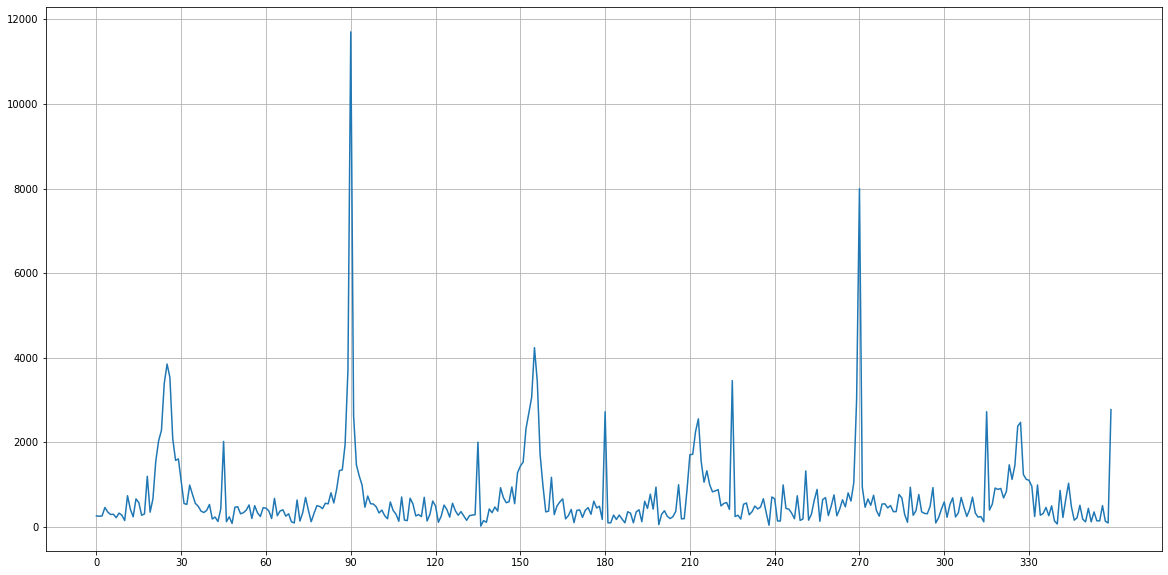

In [194]:
# Ploteamos un histograma de los valores de angulos para ver cuales son los mas representativos
plt.figure(1,figsize=(20,10))
hist,bins = np.histogram(angle,360,[-180,180])
plt.plot(hist)
plt.xticks(np.arange(0,360,step=30))
plt.grid()

Observando el histograma, vemos que los valores mas representativos son (tener en cuanta que el 180 del histograma corresponde a 0°) -150°,-90°,-30°,30°,90°,150°. Con estos valores, y considerando una banda alrededor de ellos, agrupamos los pixeles de borde (tomando un valor de umbral para la magnitud)

In [246]:
M, N = angle.shape
angle_borde = np.zeros((M,N), dtype= np.uint8)
umbral = 150
banda = 15
delta = 255/6

for i in range(1,M-1):
    for j in range(1,N-1):
        if mag[i,j] > umbral:
            if (-150-banda <= angle[i,j] < -150+banda):
                angle_borde[i, j] = 1*delta
            elif (-90-banda <= angle[i,j] < -90+banda):
                angle_borde[i, j] = 2*delta
            elif (-30-banda <= angle[i,j] < -30+banda):
                angle_borde[i, j] = 3*delta
            elif (30-banda <= angle[i,j] < 30+banda):
                angle_borde[i, j] = 4*delta
            elif (90-banda <= angle[i,j] < 90+banda):
                angle_borde[i, j] = 5*delta
            elif (150-banda <= angle[i,j] < 150+banda):
                angle_borde[i, j] = 6*delta
   

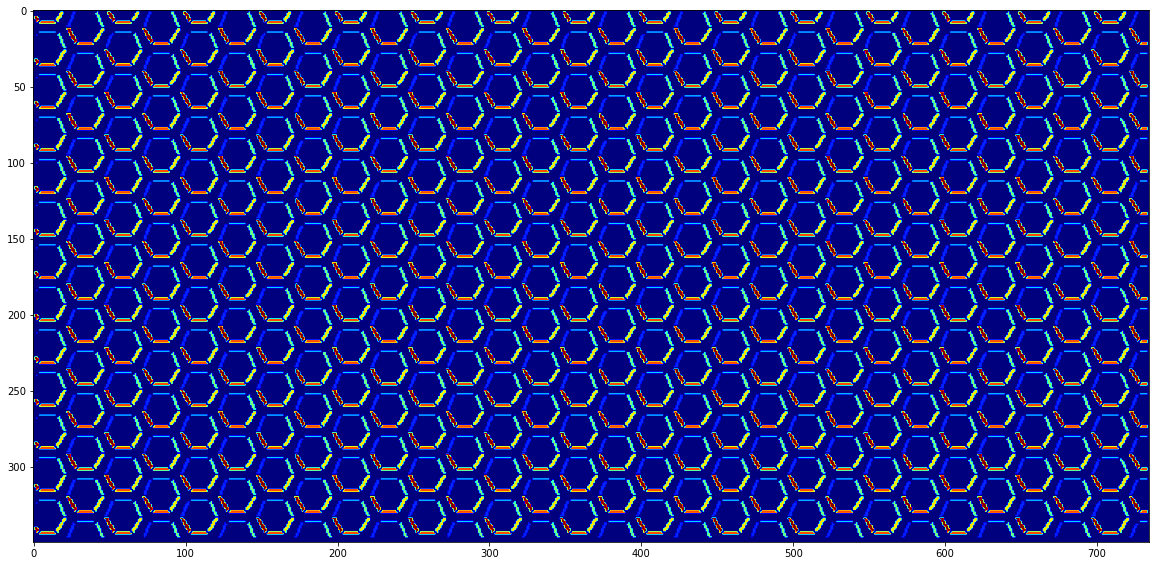

In [247]:
# Ploteamos los bordes segun su angulo
plt.figure(1,figsize=(20,10))
plt.imshow(angle_borde,'jet')

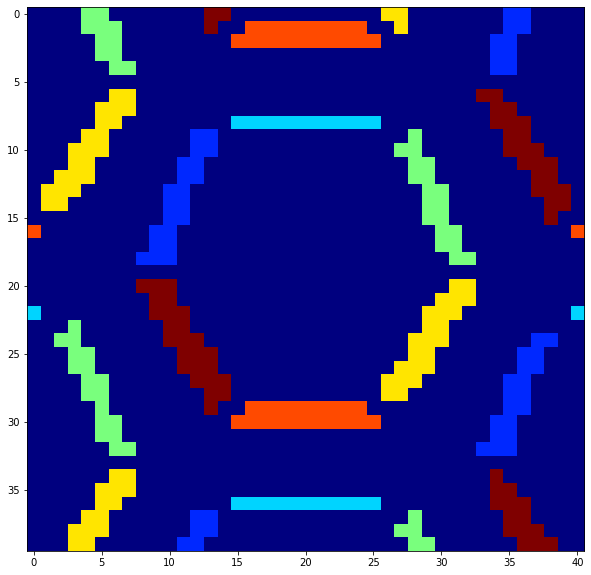

In [248]:
# Ploteamos los bordes segun su angulo con zoom en un hexagono
plt.figure(1,figsize=(20,10))
plt.imshow(angle_borde[202:242,339:380],'jet')